In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import warnings
warnings.filterwarnings("ignore")


### K-Means

In [4]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array([
    [5, 6],
    [15, 16],
    [6, 4],
    [16, 16],
    [17, 18],
    [7, 3],
    [6.5, 4.5]
])

result = KMeans(n_clusters=2)
result.fit(data)

print("Cluster assignments: ")
print(result.labels_)

print("Cluster centroids: ")
print(result.cluster_centers_)

Cluster assignments: 
[0 1 0 1 1 0 0]
Cluster centroids: 
[[ 6.125       4.375     ]
 [16.         16.66666667]]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/mall-customer-csv/Mall_Customers.csv')
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

print("Before renaming:", df.columns.tolist())


df = df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
})
print("After renaming:", df.columns.tolist())

X = df[['Annual_Income', 'Spending_Score']]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Before renaming: ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
After renaming: ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']


#### Within-cluster sum of squares

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('/kaggle/input/mall-customer-csv/Mall_Customers.csv')


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#### Apply k means

In [21]:
os.environ["OMP_NUM_THREADS"] = "1"  
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



#### Plotting

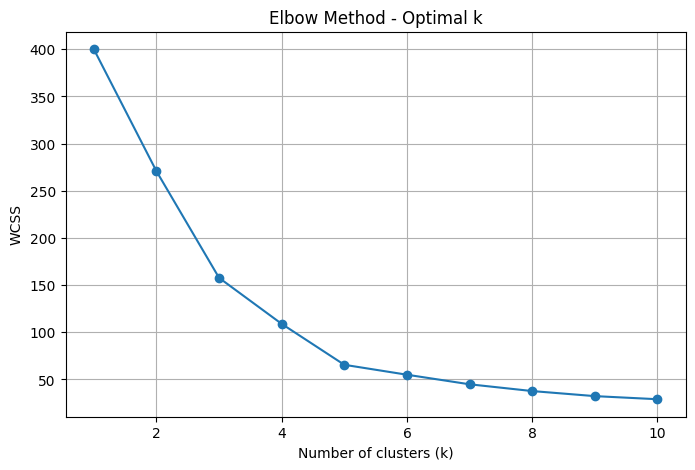

In [22]:

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#### Apply KMeans with optimal clusters

In [23]:
kmeans=KMeans(n_clusters=5,random_state=42)
clusters=kmeans.fit_predict(X_scaled)

#### Add the cluster info back to original data

In [ ]:
df['Cluster']=clusters

#### Visualize the clusters

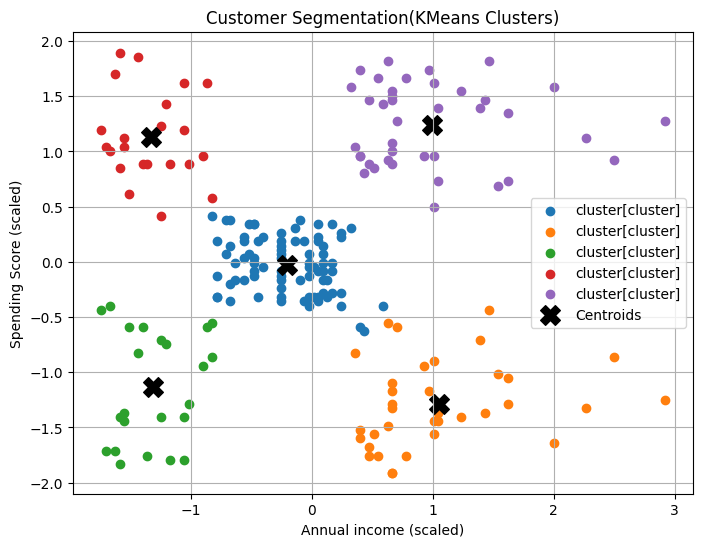

In [24]:
plt.figure(figsize=(8,6))
for cluster in range(5):
    plt.scatter(X_scaled[clusters==cluster,0],X_scaled[clusters==cluster,1],label=f'cluster[cluster]')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',marker='X',label='Centroids')
plt.title('Customer Segmentation(KMeans Clusters)')
plt.xlabel('Annual income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()